In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def solve_lidDrivenCavity(Re, n, end_time, dt=0.001):
    # n = 60
    x = np.linspace(0, 1, n)
    y = np.linspace(0, 1, n)
    U = 1
    # dt = 0.001
    # end_time = 0.5
    write_interval = 100  # Timesteps
    h = x[1] - x[0]
    # Re = 1000
    nu = 1 / Re
    xx, yy = np.meshgrid(x, y)
    vort = np.zeros((n, n))
    psi = np.zeros((n, n))

    # Boundary conditions
    vort[:, -1] = -2 * U / h  # Top boundary condition

    # Time loop
    t = 0
    iter_count = 0
    s = 0
    run = True

    if run:
        vort_out, psi_out, u_out, v_out = [], [], [], []
        vort_residual_out, psi_residual_out, times = [], [], []

        while t < end_time:
            vort_old = vort.copy()
            psi_old = psi.copy()
            iter_count += 1
            t += dt
            
            # Vorticity update
            for i in range(1, n-1):
                for j in range(1, n-1):
                    vort[i, j] += dt * (
                        -(psi[i, j+1] - psi[i, j-1]) * (vort[i+1, j] - vort[i-1, j]) / (4 * h**2)
                        + (psi[i+1, j] - psi[i-1, j]) * (vort[i, j+1] - vort[i, j-1]) / (4 * h**2)
                        + nu * (vort[i+1, j] + vort[i-1, j] + vort[i, j+1] + vort[i, j-1] - 4 * vort[i, j]) / h**2
                    )

            # Boundary conditions
            vort[1:-1, 0] = 2 * (psi[1:-1, 0] - psi[1:-1, 1]) / h**2  # Bottom
            vort[1:-1, -1] = 2 * (psi[1:-1, -1] - psi[1:-1, -2]) / h**2 - 2 * U / h  # Top
            vort[0, 1:-1] = 2 * (psi[0, 1:-1] - psi[1, 1:-1]) / h**2  # Left
            vort[-1, 1:-1] = 2 * (psi[-1, 1:-1] - psi[-2, 1:-1]) / h**2  # Right
            
            # Stream function update (iterative solution of Poisson's equation)
            for i in range(1, n-1):
                for j in range(1, n-1):
                    psi[i, j] = 0.25 * (h**2 * vort[i, j] + psi[i+1, j] + psi[i-1, j] + psi[i, j+1] + psi[i, j-1])
            
            # Calculate velocities
            u = np.zeros((n, n))
            v = np.zeros((n, n))
            u[1:-1, 1:-1] = (psi[1:-1, 2:] - psi[1:-1, :-2]) / (2 * h)
            v[1:-1, 1:-1] = (psi[2:, 1:-1] - psi[:-2, 1:-1]) / (2 * h)
            u[:, -1] = U
            
            # Calculate residuals
            vort_residual = np.max(np.abs(vort - vort_old))
            psi_residual = np.max(np.abs(psi - psi_old))
            
            if iter_count % write_interval == 0:
                s += 1
                vort_out.append(vort.copy())
                psi_out.append(psi.copy())
                u_out.append(u.copy())
                v_out.append(v.copy())
                vort_residual_out.append(vort_residual)
                psi_residual_out.append(psi_residual)
                times.append(t)
                print(f'Calculating ... time = {t:.3f}')

    return vort_out, psi_out, u_out, v_out, vort_residual_out, psi_residual_out, times

In [3]:
n = 60
Re = 100
t = 10
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)

xx, yy = np.meshgrid(x, y)

In [4]:
vort_out_Re_100, psi_out_Re_100, u_out_Re_100, v_out_Re_100, vort_residual_out_Re_100, psi_residual_out_Re_100, times_Re_100 = solve_lidDrivenCavity(Re, n, t)

Calculating ... time = 0.100
Calculating ... time = 0.200
Calculating ... time = 0.300
Calculating ... time = 0.400
Calculating ... time = 0.500
Calculating ... time = 0.600
Calculating ... time = 0.700
Calculating ... time = 0.800
Calculating ... time = 0.900
Calculating ... time = 1.000
Calculating ... time = 1.100
Calculating ... time = 1.200
Calculating ... time = 1.300
Calculating ... time = 1.400
Calculating ... time = 1.500
Calculating ... time = 1.600
Calculating ... time = 1.700
Calculating ... time = 1.800
Calculating ... time = 1.900
Calculating ... time = 2.000
Calculating ... time = 2.100
Calculating ... time = 2.200
Calculating ... time = 2.300
Calculating ... time = 2.400
Calculating ... time = 2.500
Calculating ... time = 2.600
Calculating ... time = 2.700
Calculating ... time = 2.800
Calculating ... time = 2.900
Calculating ... time = 3.000
Calculating ... time = 3.100
Calculating ... time = 3.200
Calculating ... time = 3.300
Calculating ... time = 3.400
Calculating ..

In [69]:
# Plot results
# fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# speed = np.sqrt(u_out[-1]**2 + v_out[-1]**2)
# axs[0].contourf(xx, yy, speed.T, levels=np.linspace(0, 1, 20), cmap='viridis')
# axs[0].set_title('Velocity Magnitude')

# axs[1].contourf(xx, yy, psi_out[-1].T, levels=10, cmap='viridis')
# axs[1].set_title('Stream Function')

# axs[2].contourf(xx, yy, np.abs(vort_out[-1].T), levels=np.logspace(-3, 2, 40), cmap='viridis')
# axs[2].set_title('Vorticity Magnitude')

# axs[3].plot(times, vort_residual_out, 'r', label='Vorticity Residual')
# axs[3].plot(times, psi_residual_out, 'b', label='Stream Function Residual')
# axs[3].set_title('Residuals')
# axs[3].legend()

# plt.show()

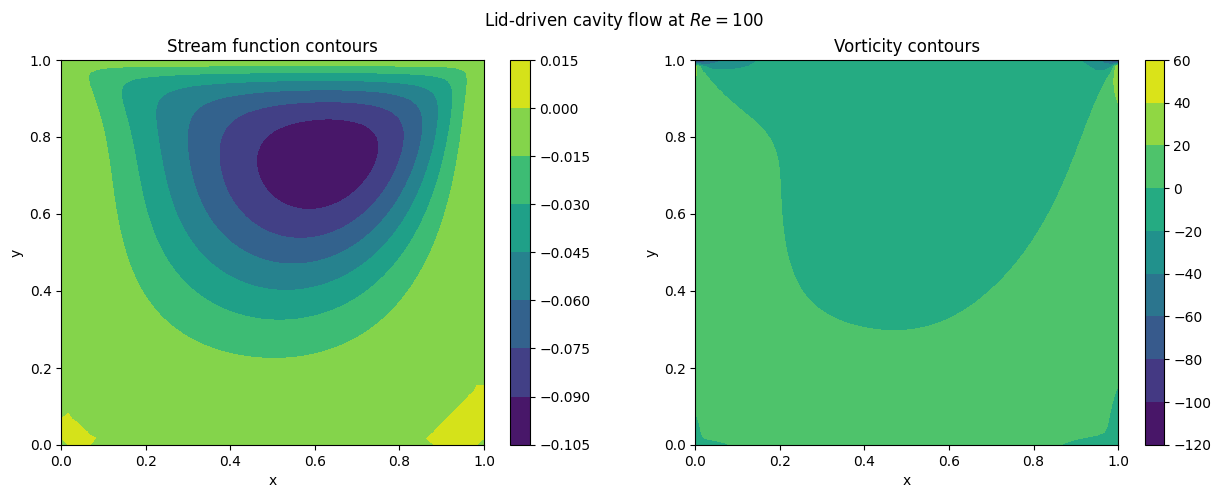

In [5]:
# plot stream function and vorticity contours
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, psi_out_Re_100[-1].T, cmap='viridis')
plt.colorbar()
plt.title('Stream function contours')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(122)
plt.contourf(xx, yy, vort_out_Re_100[-1].T, cmap='viridis')
plt.colorbar()
plt.title('Vorticity contours')
plt.xlabel('x')
plt.ylabel('y')

# title of plot
plt.suptitle('Lid-driven cavity flow at $Re=100$')
plt.show()

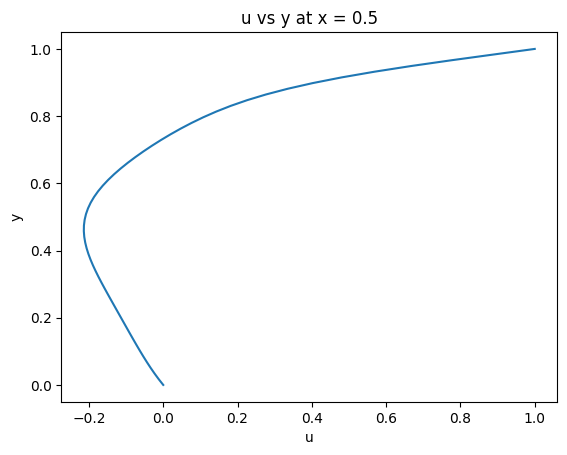

In [6]:
# Plot u vs y at x = 0.5
plt.figure()
plt.plot(u_out_Re_100[-1][30, :], y)
plt.xlabel('u')
plt.ylabel('y')
plt.title('u vs y at x = 0.5')
plt.show()


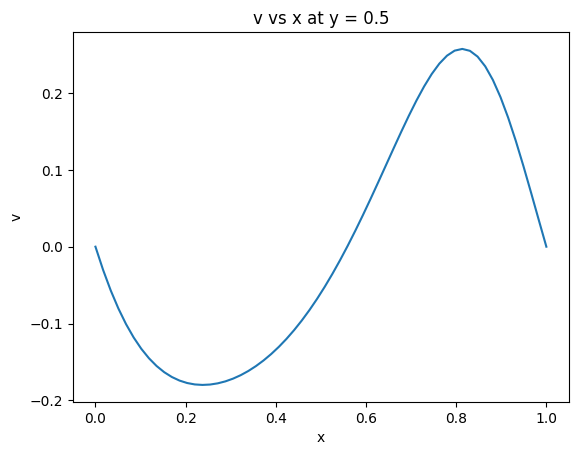

In [7]:
# Plot x vs v at y = 0.5
plt.figure()
plt.plot(x, v_out_Re_100[-1][:, 30])
plt.xlabel('x')
plt.ylabel('v')
plt.title('v vs x at y = 0.5')
plt.show()


In [8]:
n = 60
Re = 400
t = 10
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)

xx, yy = np.meshgrid(x, y)

vort_out_Re_400, psi_out_Re_400, u_out_Re_400, v_out_Re_400, vort_residual_out_Re_400, psi_residual_out_Re_400, times_Re_400 = solve_lidDrivenCavity(Re, n, t)

Calculating ... time = 0.100
Calculating ... time = 0.200
Calculating ... time = 0.300
Calculating ... time = 0.400
Calculating ... time = 0.500
Calculating ... time = 0.600
Calculating ... time = 0.700
Calculating ... time = 0.800
Calculating ... time = 0.900
Calculating ... time = 1.000
Calculating ... time = 1.100
Calculating ... time = 1.200
Calculating ... time = 1.300
Calculating ... time = 1.400
Calculating ... time = 1.500
Calculating ... time = 1.600
Calculating ... time = 1.700
Calculating ... time = 1.800
Calculating ... time = 1.900
Calculating ... time = 2.000
Calculating ... time = 2.100
Calculating ... time = 2.200
Calculating ... time = 2.300
Calculating ... time = 2.400
Calculating ... time = 2.500
Calculating ... time = 2.600
Calculating ... time = 2.700
Calculating ... time = 2.800
Calculating ... time = 2.900
Calculating ... time = 3.000
Calculating ... time = 3.100
Calculating ... time = 3.200
Calculating ... time = 3.300
Calculating ... time = 3.400
Calculating ..

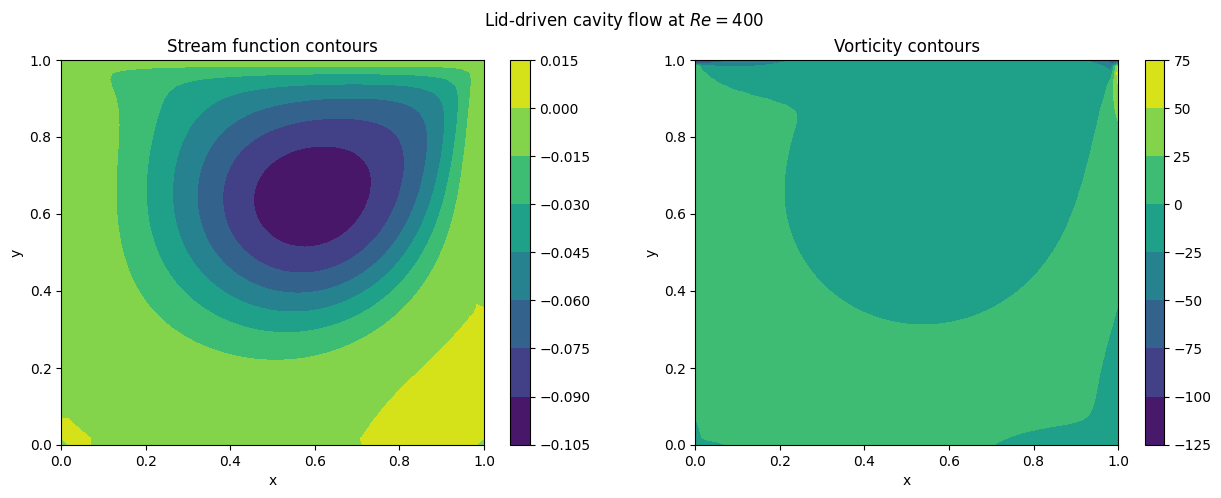

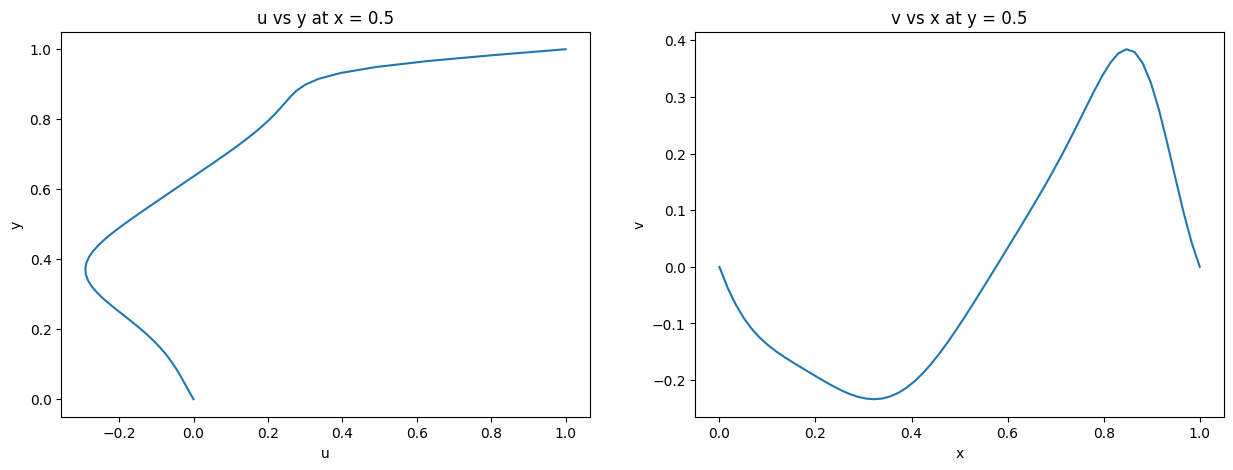

In [9]:
# plot stream function and vorticity contours
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, psi_out_Re_400[-1].T, cmap='viridis')
plt.colorbar()
plt.title('Stream function contours')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(122)
plt.contourf(xx, yy, vort_out_Re_400[-1].T, cmap='viridis')
plt.colorbar()
plt.title('Vorticity contours')
plt.xlabel('x')
plt.ylabel('y')

# title of plot
plt.suptitle('Lid-driven cavity flow at $Re=400$')
plt.show()

# plot u vs y at x = 0.5 and x vs v at y = 0.5
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(u_out_Re_400[-1][30, :], y)
plt.xlabel('u')
plt.ylabel('y')
plt.title('u vs y at x = 0.5')

plt.subplot(122)
plt.plot(x, v_out_Re_400[-1][:, 30])
plt.xlabel('x')
plt.ylabel('v')
plt.title('v vs x at y = 0.5')

plt.show()


In [10]:
# For Re = 1000
n = 60
Re = 1000
t = 10
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)

xx, yy = np.meshgrid(x, y)

vort_out_Re_1000, psi_out_Re_1000, u_out_Re_1000, v_out_Re_1000, vort_residual_out_Re_1000, psi_residual_out_Re_1000, times_Re_1000 = solve_lidDrivenCavity(Re, n, t)

Calculating ... time = 0.100
Calculating ... time = 0.200
Calculating ... time = 0.300
Calculating ... time = 0.400
Calculating ... time = 0.500
Calculating ... time = 0.600
Calculating ... time = 0.700
Calculating ... time = 0.800
Calculating ... time = 0.900
Calculating ... time = 1.000
Calculating ... time = 1.100
Calculating ... time = 1.200
Calculating ... time = 1.300
Calculating ... time = 1.400
Calculating ... time = 1.500
Calculating ... time = 1.600
Calculating ... time = 1.700
Calculating ... time = 1.800
Calculating ... time = 1.900
Calculating ... time = 2.000
Calculating ... time = 2.100
Calculating ... time = 2.200
Calculating ... time = 2.300
Calculating ... time = 2.400
Calculating ... time = 2.500
Calculating ... time = 2.600
Calculating ... time = 2.700
Calculating ... time = 2.800
Calculating ... time = 2.900
Calculating ... time = 3.000
Calculating ... time = 3.100
Calculating ... time = 3.200
Calculating ... time = 3.300
Calculating ... time = 3.400
Calculating ..

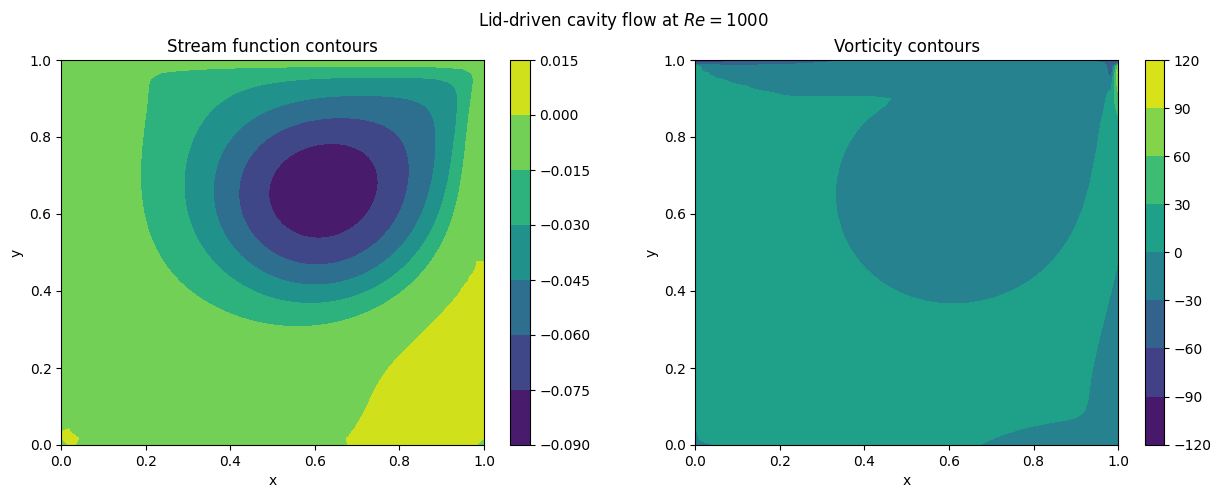

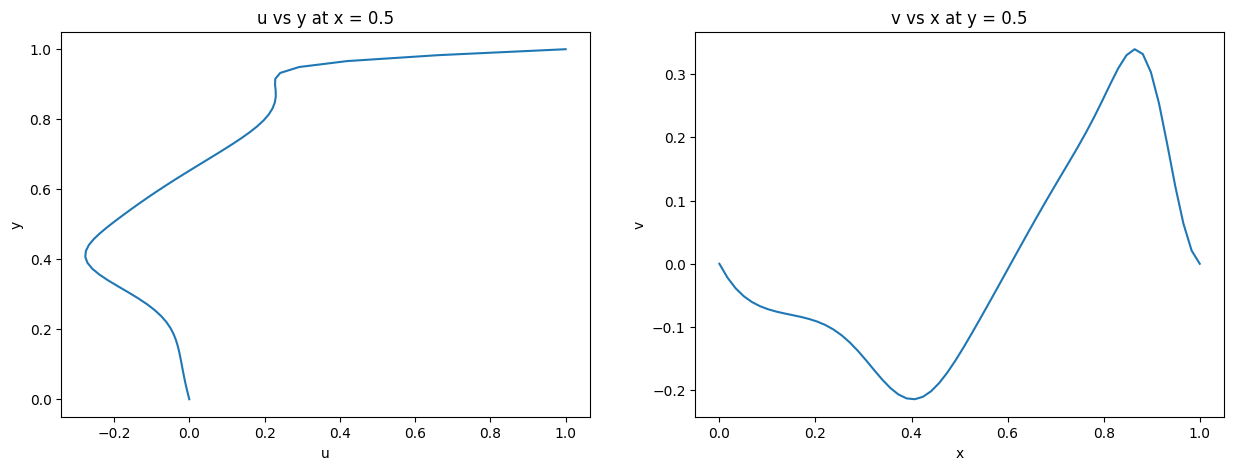

In [11]:
# plot stream function and vorticity contours
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, psi_out_Re_1000[-1].T, cmap='viridis')
plt.colorbar()
plt.title('Stream function contours')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(122)
plt.contourf(xx, yy, vort_out_Re_1000[-1].T, cmap='viridis')
plt.colorbar()
plt.title('Vorticity contours')
plt.xlabel('x')
plt.ylabel('y')

# title of plot
plt.suptitle('Lid-driven cavity flow at $Re=1000$')
plt.show()

# plot u vs y at x = 0.5 and x vs v at y = 0.5
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(u_out_Re_1000[-1][30, :], y)
plt.xlabel('u')
plt.ylabel('y')
plt.title('u vs y at x = 0.5')

plt.subplot(122)
plt.plot(x, v_out_Re_1000[-1][:, 30])
plt.xlabel('x')
plt.ylabel('v')
plt.title('v vs x at y = 0.5')

plt.show()


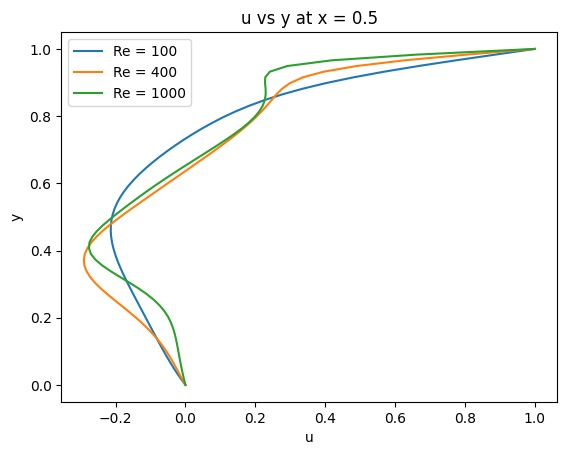

In [12]:
# plot u vs y at x = 0.5 for all Re
plt.figure()
plt.plot(u_out_Re_100[-1][30, :], y, label='Re = 100')
plt.plot(u_out_Re_400[-1][30, :], y, label='Re = 400')
plt.plot(u_out_Re_1000[-1][30, :], y, label='Re = 1000')
plt.xlabel('u')
plt.ylabel('y')
plt.title('u vs y at x = 0.5')
plt.legend()
plt.show()

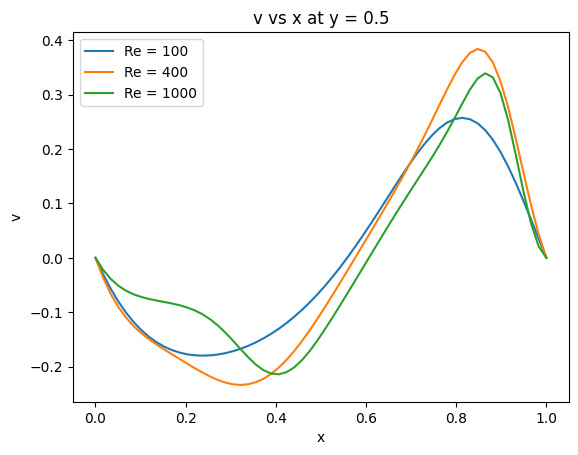

In [13]:
# plot x vs v at y = 0.5 for all Re
plt.figure()
plt.plot(x, v_out_Re_100[-1][:, 30], label='Re = 100')
plt.plot(x, v_out_Re_400[-1][:, 30], label='Re = 400')
plt.plot(x, v_out_Re_1000[-1][:, 30], label='Re = 1000')
plt.xlabel('x')
plt.ylabel('v')
plt.title('v vs x at y = 0.5')
plt.legend()
plt.show()